# Atenção!
## Faça Backup de seu ipython_config.py antes de executar este notebook
## Ele será deletado!

In [10]:
import os, errno
import shutil

def rm(func):
    try:
        func()
    except OSError as e:
        if e.errno != errno.ENOENT:
            raise
            
remove = lambda filename: rm(lambda: os.remove(filename))
rmtree = lambda dirname: rm(lambda: shutil.rmtree(dirname))

remove("minhaext.py")
remove(os.path.expanduser(os.path.join("~", ".ipython", "extensions", "minhaext.py")))
remove(os.path.expanduser(os.path.join("~", ".ipython", "profile_default", "ipython_config.py")))
rmtree("ipythonext")
rmtree("nbext")
rmtree(os.path.expanduser(os.path.join("~", ".local", "share", "jupyter", "nbextensions", "nbext")))
rmtree(os.path.expanduser(os.path.join("~", "AppData", "Roaming", "jupyter", "nbextensions", "nbext")))

import json
notebook_config_path =  os.path.expanduser(os.path.join("~", ".jupyter", "nbconfig", "notebook.json"))
config = json.load(open(notebook_config_path, "r"))
if 'nbext/index' in config['load_extensions']:
    del config['load_extensions']['nbext/index']
json.dump(config, open(notebook_config_path, "w"))

# Como Criar Extensões para o Jupyter Notebook


&nbsp;

[João Felipe Nicolaci Pimentel](http://joao.npimentel.net/)  
joaofelipenp@gmail.com  
https://github.com/JoaoFelipe/presentations/20160820_PythonRio_Niteroi




&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


## Jupyter Notebook

* Aplicação Web

* Permite criar e compartilhar documentos

In [ ]:
%%javascript
element.text(IPython.notebook.notebook_path)

* Texto, equações (markdown + latex)

$$a = 16; b = 32; c = 22$$

$$\sqrt{a^2 + b^2 + c^2}$$

* Código

In [ ]:
a, b, c = 16, 32, 22
(a ** 2 + b ** 2 + c ** 2) ** 0.5

* Visualizações

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

x = np.linspace(-100, 100, 100)
plt.plot(x, mlab.normpdf(x, 0, 30))
plt.plot([_, _], [0, .014])



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


## IPython

* Kernel para Jupyter Notebook
* [Superset de Python](http://ipython.readthedocs.io/en/stable/interactive/python-ipython-diff.html)

In [ ]:
comando = "--version"
!python {comando}

In [ ]:
variaveis = %who_ls
for var, _ in zip(variaveis, range(3)):
    print(var, eval(var))

In [ ]:
%who_ls?

* Autocompletar

In [ ]:
from IPython.display import Image
Image("autocompletar.png")



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


## Mais Interações!

In [ ]:
from IPython.display import Image
Image("noworkflow.png")

In [ ]:
from IPython.display import Image
Image("ipythonunittest.png")



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


## Extensões

* [Integração de Objetos com IPython](http://ipython.readthedocs.io/en/stable/config/integrating.html)
* [Extensão IPython](http://ipython.readthedocs.io/en/stable/config/extensions/index.html)
* [nbextension](http://jupyter-notebook.readthedocs.io/en/latest/extending/frontend_extensions.html)
  * Também chamada de extensão front-end
-----

* [Extensão de servidor](http://jupyter-notebook.readthedocs.io/en/latest/extending/handlers.html#writing-a-notebook-server-extension)
  * Novas rotas. Novos tratamentos de requisição. Hooks na hora de salvar
* [Extensão bundler](http://jupyter-notebook.readthedocs.io/en/latest/extending/bundler_extensions.html)
  * Download as
  * Deploy
 



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


## Integração de Objetos com IPython

* Visualização
  * svg, png, jpeg, html, javascript, latex
* Opções de Autocompletar
---
* Traceback de exceções



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


### Visualização

* Defina um método ```_repr_*_(self)```
  * svg, png, jpeg, html, javascript, latex

In [ ]:
class Raiz:
    def __init__(self, numero):
        self.numero = numero
    
    def formula(self):
        text = self.numero
        if hasattr(self.numero, "formula"):
            text = self.numero.formula()
        return "\sqrt{%s}" % (text,)
    
    def _repr_latex_(self):
        return "$${}$$".format(self.formula())
    
Raiz(25)



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


In [ ]:
import os
from subprocess import Popen, PIPE as P

class Grafo:
    def __init__(self, adjacentes):
        self.adjacentes = adjacentes
    
    def dottext(self):
        result = [
            "  {} -> {};".format(no, adjacente)
            for no, lista in self.adjacentes.items()
            for adjacente in lista
        ]
        return "digraph G {{\n  ranksep=0.25;\n{}\n}}".format("\n".join(result))

    def dot(self, format="png"):  # ToDo: Tratar erro
        kwargs = {} if os.name != 'nt' else {"creationflags": 0x08000000}
        p = Popen(['dot', '-T', format], stdout=P, stdin=P, stderr=P, **kwargs)
        return p.communicate(self.dottext().encode('utf-8'))[0]
    
    def __repr__(self):
        return self.dottext()
    
    def _repr_svg_(self):
        return self.dot("svg").decode("utf-8")
    
    def _repr_png_(self):
        return self.dot("png")
    
grafo = Grafo({"a": ["b", "c"], "b": ["d"], "c": ["d"]})

In [ ]:
grafo

In [ ]:
from IPython.display import display_png
display_png(grafo)

In [ ]:
from IPython.display import display_pretty
display_pretty(grafo)



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


### Autocompletar

* IPython usa a função ```dir```: sobrescreva ```__dir__```

In [ ]:
from string import ascii_letters

class Alfabeto:
    def __getattr__(self, letter):
        return ord(letter.lower()) - ord('a') + 1
    
    def __dir__(self):
        return list(ascii_letters)
    
alfabeto = Alfabeto()

In [ ]:
alfabeto.J

In [ ]:
from IPython.display import Image
Image("autocompletar2.png")



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


## Extensão IPython

* Funcionam como módulos
* Funcionalidades específicas do IPython
  * Magics (Line, Cell)
  * Callbacks
  



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


### Extensão IPython - Módulos

In [ ]:
%%writefile minhaext.py
def load_ipython_extension(ipython):
    print("Carregou")

def unload_ipython_extension(ipython):
    print("Descarregou")

In [ ]:
%load_ext minhaext

In [ ]:
%reload_ext minhaext

In [ ]:
%unload_ext minhaext



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


* Módulos também podem ser instalados em ~/.ipython/extensions/

In [ ]:
import os
extensions_path = os.path.expanduser(os.path.join("~", ".ipython", "extensions")) 
os.listdir(extensions_path)

In [ ]:
#%install_ext minhaext.py
import os
os.rename("minhaext.py", os.path.join(extensions_path, "minhaext.py"))

In [ ]:
import os
os.listdir(os.path.expanduser(os.path.join("~", ".ipython", "extensions")))

In [ ]:
%load_ext minhaext



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


* É melhor criar pacotes Python

In [ ]:
import os
projects_dir, extension_name = ".", "ipythonext"
os.makedirs(os.path.join(projects_dir, extension_name, extension_name))

In [ ]:
%%writefile {projects_dir}/{extension_name}/setup.py
from setuptools import setup, find_packages
setup(
    name="IPython Extension",
    version="1.0",
    description="How to create IPython Extensions",
    author="JF",
    author_email="joaofelipenp@gmail.com",
    packages=find_packages(),
)

In [ ]:
%%writefile {projects_dir}/{extension_name}/{extension_name}/__init__.py
def load_ipython_extension(ipython):
    print("Carregou")

In [ ]:
!pip install -e {projects_dir}/{extension_name}

In [ ]:
%%javascript
// Reiniciando Kernel
// [*] não vai sumir
IPython.notebook.kernel.restart()

In [ ]:
%load_ext ipythonext



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


* Para evitar ```%load_ext```, liste as extensões que serão carregadas no arquivo de configuração

In [ ]:
!ipython profile create

In [ ]:
import os
profile_path = os.path.expanduser(os.path.join("~", ".ipython", "profile_default", "ipython_config.py"))

In [ ]:
%%writefile -a {profile_path}
c.InteractiveShellApp.extensions = [
    'minhaext',
]

In [ ]:
%unload_ext minhaext

In [ ]:
%%javascript
// Reiniciando Kernel
// [*] não vai sumir
IPython.notebook.kernel.restart()

In [ ]:
%load_ext minhaext

In [ ]:
%unload_ext minhaext
import os
os.remove(os.path.expanduser(os.path.join("~", ".ipython", "profile_default", "ipython_config.py")))
os.remove(os.path.expanduser(os.path.join("~", ".ipython", "extensions", "minhaext.py")))



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


### O que fazer com extensões

```python
def load_ipython_extension(ipython: "InteractiveShell"):
```

* Registrar Magics
* Registrar Callbacks

In [ ]:
ipython = get_ipython()



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


#### Registrando Magics

In [ ]:
def ospath(line):
    from os import path
    return getattr(path, line) if line else path

ipython.register_magic_function(ospath, magic_kind='line')

In [ ]:
# from os.path import join
funcao = "join"
join = %ospath {funcao}
join("a", "b")



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


In [ ]:
from IPython.core.magic import Magics, magics_class, line_magic, cell_magic, line_cell_magic
from IPython.core.magic_arguments import argument, magic_arguments, parse_argstring
from IPython.display import Javascript, display

@magics_class
class Magicas(Magics):
    @magic_arguments()
    @argument('-b', '--backward', default=-1, type=int, help="set cursor to P cells before")
    @argument('-f', '--forward', default=-1, type=int, help="set cursor to P cells after")
    @line_magic
    def move(self, line):
        args = parse_argstring(self.move, line)
        if args.forward != -1:
            args.backward = -args.forward
        if args.backward != -1:
            display(Javascript(
                "Jupyter.notebook.select("
                "Jupyter.notebook.get_selected_index() - {})"
                .format(args.backward + 1)
            ))
    
    @line_cell_magic
    def decorar(self, line, cell=None):
        decorador = line.split(" ")[0]
        if cell is None:
            funcao = line.split(" ")[-1]
            self.shell.user_ns[funcao] = self.shell.user_ns[decorador](self.shell.user_ns[funcao])
        else:
            tree = ast.parse(cell)
            tree = TransformarDefinicoes(decorador).visit(tree)
            compiled = compile(tree, 'Cell Tests', 'exec')
            exec(compiled, self.shell.user_global_ns, self.shell.user_ns)

In [ ]:
import ast
class TransformarDefinicoes(ast.NodeTransformer):
    def __init__(self, decorador):
        self.decorador = decorador
    def visit_FunctionDef(self, node):
        node.decorator_list.append(ast.copy_location(ast.Name(self.decorador, ast.Load()), node))
        return node
    

ipython.register_magics(Magicas)

In [ ]:
from functools import wraps
def imprimir_chamadas(f):
    @wraps(f)
    def dec(*args, **kwargs):
        result = f(*args, **kwargs) 
        print("{}(*{}, **{}) = {}".format(f.__name__, args, kwargs, result))
        return result
    return dec

In [ ]:
%%decorar imprimir_chamadas
def soma(x, y):
    return x + y

In [ ]:
soma(1, 2)

In [ ]:
def subtracao(x, y):
    return x - y
%decorar imprimir_chamadas subtracao
subtracao(1, 2)

In [ ]:
%move -b 1



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


#### Registrando callbacks

In [ ]:
ipython = get_ipython()
from datetime import datetime
class Timer:
    def __init__(self):
        self.initial = datetime.now()
    def pre_execute(self):
        self.initial = datetime.now()
    def post_execute(self):
        print(datetime.now() - self.initial)
timer = Timer()
timer.pre_execute()
ipython.events.register("pre_run_cell", timer.pre_execute)
ipython.events.register("post_run_cell", timer.post_execute)

In [ ]:
from time import sleep
sleep(0.5)

In [ ]:
%%javascript
// Reiniciando Kernel
// [*] não vai sumir
IPython.notebook.kernel.restart()



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


In [1]:
# Bonus: IPython Magic semelhante a writefile que aceita substituições em Cell

def template(line, cell):
    ipython = get_ipython()
    return ipython.run_cell_magic("writefile", line, cell.format(**ipython.user_ns))

get_ipython().register_magic_function(template, magic_kind="cell")

## Extensão Front-end (nbextension)

* Distribuídas como módulos Python (PyPI)
* Porém possuem apenas Javascript, CSS e HTML para o notebook

In [2]:
import os
projects_dir, extension_name = ".", "nbext"
os.makedirs(os.path.join(projects_dir, extension_name, extension_name, "static"))

In [3]:
%%template {projects_dir}/{extension_name}/setup.py
import os
from setuptools import setup, find_packages
setup(
    name="Jupyter Notebook Extension",
    version="1.0",
    description="How to create Jupyter Extensions",
    author="JF",
    author_email="joaofelipenp@gmail.com",
    packages=find_packages(),
    package_data={{"{extension_name}": [os.path.join("static", "index.js")]}}
)

Writing ./nbext/setup.py


In [4]:
%%template {projects_dir}/{extension_name}/{extension_name}/__init__.py
def _jupyter_nbextension_paths():
    return [dict(
        section="notebook",
        src="static",
        dest="{extension_name}",
        require="{extension_name}/index"
    )]

Writing ./nbext/nbext/__init__.py


In [5]:
%%template {projects_dir}/{extension_name}/{extension_name}/static/index.js
define([
    'base/js/namespace'
], function(
    Jupyter
) {{
    function load_ipython_extension() {{
        var handler = function () {{
            var fn = prompt("Nome da função?");
            Jupyter.notebook.insert_cell_below().set_text("%%unittest -p 1 -d\nassert "+fn+"() == 0");
            Jupyter.notebook.insert_cell_below().set_text("def "+fn+"():\n    pass");
            Jupyter.notebook.insert_cell_below().set_text("%load_ext ipython_unittest");
        }};

        var action = {{
            icon: 'fa-group', // a font-awesome class used on buttons, etc
            help    : 'Iniciar dojo',
            help_index : 'zz',
            handler : handler
        }};
        var prefix = '{extension_name}';
        var action_name = 'start-dojo';

        var full_action_name = Jupyter.actions.register(action, name, prefix);
        Jupyter.toolbar.add_buttons_group([full_action_name]);            
    }}
    return {{
        load_ipython_extension: load_ipython_extension
    }};
}});
            

Writing ./nbext/nbext/static/index.js




&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


In [6]:
!pip install -e {projects_dir}/{extension_name}

Obtaining file:///home/joao/projects/presentations/20160820_PythonRio_Niteroi/nbext
  Running setup.py develop for Jupyter-Notebook-Extension


In [7]:
# --symlink
!jupyter nbextension install --py {extension_name} --user

Installing /home/joao/projects/presentations/20160820_PythonRio_Niteroi/nbext/nbext/static -> nbext
Up to date: /home/joao/.local/share/jupyter/nbextensions/nbext/index.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable nbext --user --py
    


In [8]:
!jupyter nbextension enable {extension_name} --user --py

Enabling notebook extension nbext/index...
      - Validating: OK


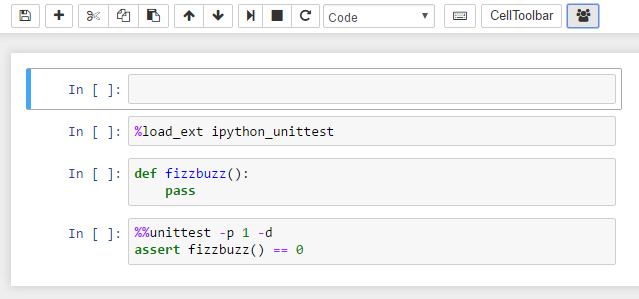

In [9]:
from IPython.display import Image
Image("nbextension.png")



&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;























# Como Criar Extensões para o Jupyter Notebook


&nbsp;

[João Felipe Nicolaci Pimentel](http://joao.npimentel.net/)  
joaofelipenp@gmail.com  
https://github.com/JoaoFelipe/presentations/20160820_PythonRio_Niteroi




&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;





















